In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)
# pd.reset_option('display.float_format')

pd.reset_option('display.float_format')# Clients


In [3]:

client_dtypes = {
   'CLIENT_ID': 'uint64',
   'TARGET': 'boolean',
   'IS_TRAIN': 'boolean',
}
clients = pd.read_csv(
   'data/samples/CLIENTS_SAMPLE.csv',
   sep=',',
   dtype=client_dtypes
)

# Rename columns to be lowercase
clients = clients.rename(columns=str.lower)

# Convert bool columns to 0 and 1
clients = clients.astype({col: 'int8' for col, dtype in zip(clients.columns, clients.dtypes) if dtype in ('bool', 'boolean')})

In [4]:
clients.head()

,client_id,target,is_train
0,11169852470826757325,1,1
1,2854396912446350740,0,1
2,3810262147897743011,0,1
3,17863891078368995171,0,1
4,2693200069225761141,0,0


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  1817 non-null   uint64
 1   target     1817 non-null   int8  
 2   is_train   1817 non-null   int8  
dtypes: int8(2), uint64(1)
memory usage: 17.9 KB


In [6]:
# clients.describe()
clients[['target', 'is_train']].mean().to_frame('Fraction')

,Fraction
target,0.228
is_train,0.783


# Transactions

In [7]:
from utils import read_transactions

transactions = read_transactions('data/samples/TRANSACTIONS_SAMPLE.csv')


In [8]:
transactions.head()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
0,4130085634078954,2025-03-26,4,211,31,0,1,1,0,0,...,0,1,1,0,0.040,0.000,2.200,-1,0.000,2.200
1,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.080,0.000,4.300,-1,0.000,4.300
2,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.040,0.000,2.340,-1,0.000,2.340
3,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.030,0.000,1.650,-1,0.000,1.650
4,4130085634078954,2025-07-04,4,209,31,0,1,1,0,0,...,0,1,1,0,0.020,0.000,1.800,-1,0.000,1.800


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787188 entries, 0 to 787187
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   client_id  787188 non-null  uint64        
 1   tran_date  787188 non-null  datetime64[ns]
 2   cat_c2     787188 non-null  int32         
 3   cat_c3     787188 non-null  int32         
 4   cat_c4     787188 non-null  int32         
 5   fl_c6      787188 non-null  int8          
 6   fl_c7      787188 non-null  int8          
 7   fl_c8      787188 non-null  int8          
 8   fl_c9      787188 non-null  int8          
 9   fl_c10     787188 non-null  int8          
 10  fl_c11     787188 non-null  int8          
 11  fl_c12     787188 non-null  int8          
 12  fl_c13     787188 non-null  int8          
 13  fl_c14     787188 non-null  int8          
 14  fl_c15     787188 non-null  int8          
 15  float_c16  787188 non-null  float32       
 16  float_c17  787188 no

In [13]:
transactions.describe()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
count,787188.000,787188,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,...,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000
mean,9451023664570427392.000,2025-04-20 01:20:23.963779584,13.108,286.126,49.187,0.010,0.967,0.999,0.001,0.000,...,0.275,0.221,0.206,0.086,0.028,0.059,61.799,-0.299,1.069,60.729
min,4130085634078954.000,2024-12-01 00:00:00,1.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-12.830,-18.200,0.000,-1.000,0.000,0.000
25%,5058706700319475712.000,2025-03-06 00:00:00,13.000,271.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.000,-1.000,0.000,3.940
50%,9820341575899443200.000,2025-04-22 00:00:00,14.000,305.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,-1.000,0.000,10.000
75%,13853360511738910720.000,2025-06-04 00:00:00,15.000,314.000,31.000,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,0.000,38.270
max,18440239832994052096.000,2025-08-31 00:00:00,74.000,422.000,860.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,75.000,194.320,20500.000,1.000,10500.000,20500.000
std,5233608170803831808.000,NaN,8.109,47.854,107.713,0.101,0.178,0.030,0.030,0.021,...,0.447,0.415,0.404,0.280,0.302,0.798,218.828,0.954,36.576,215.860


In [13]:
# Get the mean of transactions by client
transactions.groupby('client_id').size().mean()

np.float64(446.504821327283)

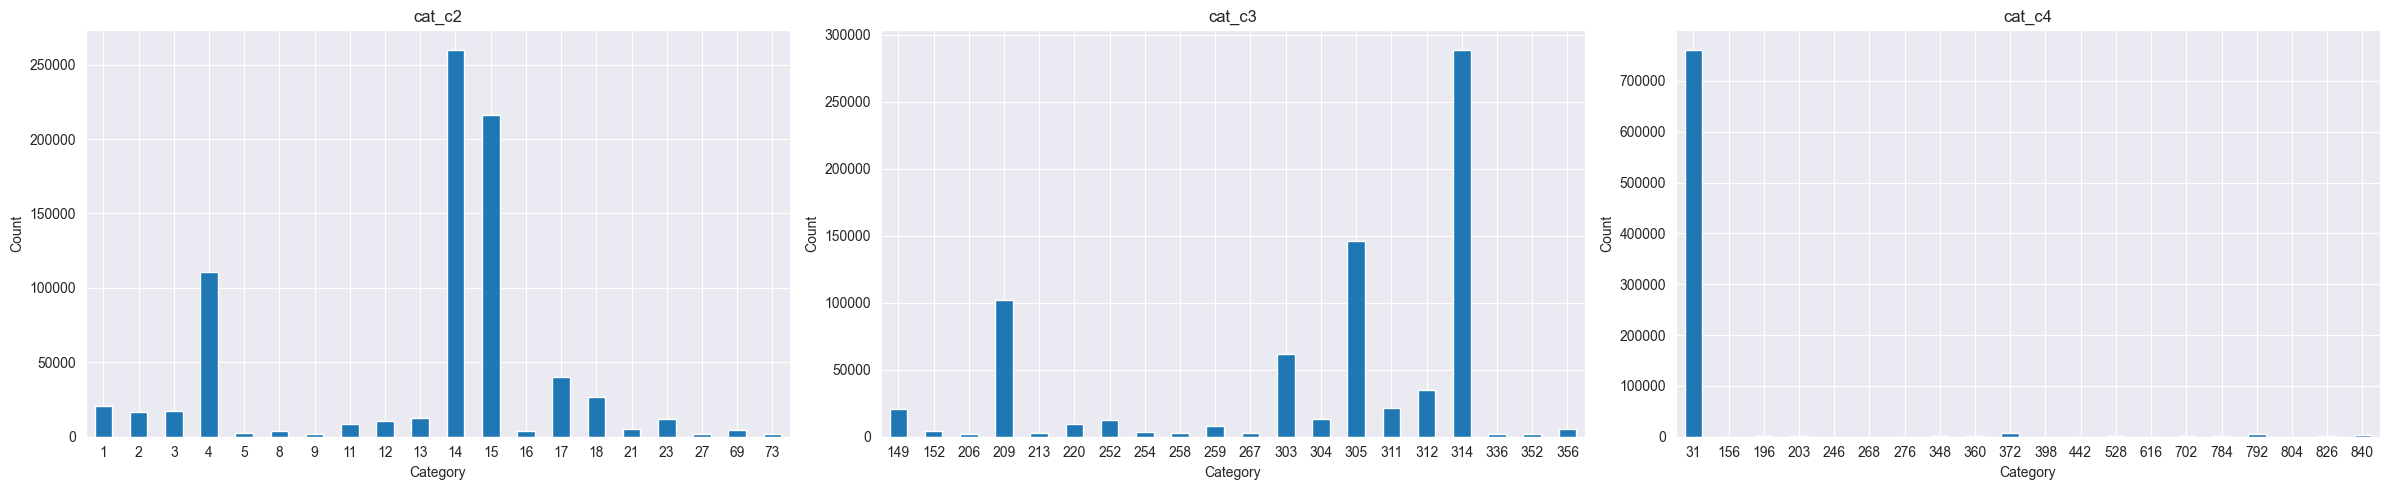

In [14]:
# Categorical data plots

cat_cols = ['cat_c2', 'cat_c3', 'cat_c4']
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = transactions[col].astype(int).value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# counts = transactions_sample['cat_c2'].astype(int).value_counts().head(20).sort_index()
# counts.plot(kind="bar", figsize=(12, 5))

# sns.countplot(x="cat_c2", data=transactions_sample, order=sorted(transactions_sample['cat_c2'].unique()))
# plt.xticks(rotation=90)
# plt.title("Distribution of cat_c2")
# plt.show()

In [15]:
# Categorical data counts

for col in ['cat_c2', 'cat_c3', 'cat_c4']:
    print(transactions[col].astype(int).value_counts().sort_index())
    print()

cat_c2
1      20645
2      16715
3      17183
4     110983
5       2444
6        413
7        893
8       3676
9       1870
10      1063
11      8239
12     10894
13     12691
14    260010
15    216499
16      3566
17     40208
18     26918
20      1492
21      5465
23     11719
24       301
25        93
26       385
27      1610
28       529
29        14
31       831
36         3
38        45
41       148
44       424
64       447
68       287
69      4502
70       105
71       141
72      1595
73      2069
74        73
Name: count, dtype: int64

cat_c3
1         8
2        11
3         3
4         2
5       213
       ... 
418      15
419     194
420    1397
421      52
422       1
Name: count, Length: 261, dtype: int64

cat_c4
8           7
31     761382
36          9
40         10
48         36
        ...  
804       173
818        31
826      1123
840      4075
860        95
Name: count, Length: 64, dtype: int64



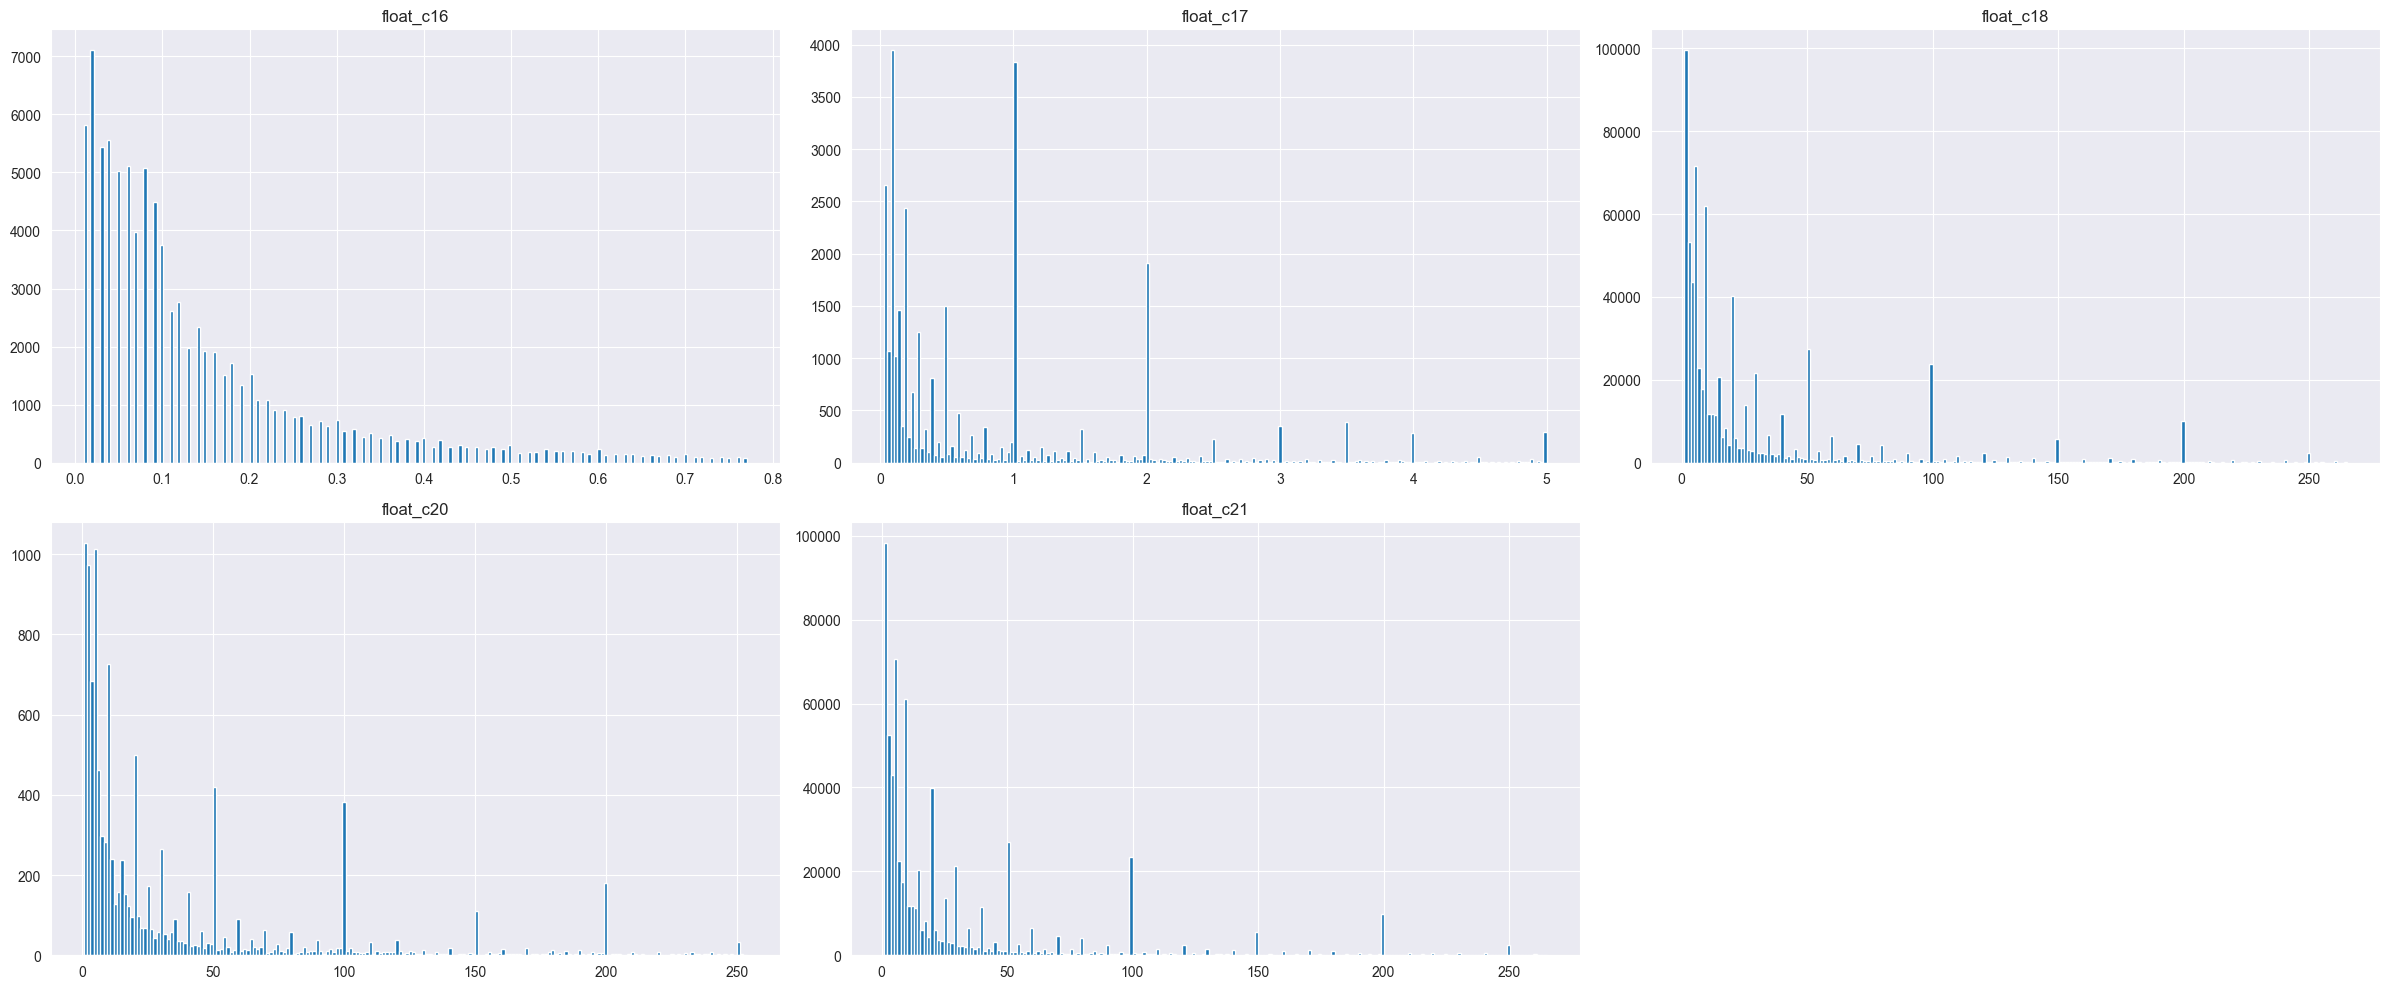

In [17]:
float_cols = ['float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(float_cols):
    ax = axes[i]
    data = transactions[col][transactions[col] != 0]
    data_filtered = data[data.between(data.quantile(.05), data.quantile(.95))]
    counts = data_filtered.hist(ax=ax, bins=200)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=0)

for j in range(len(float_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


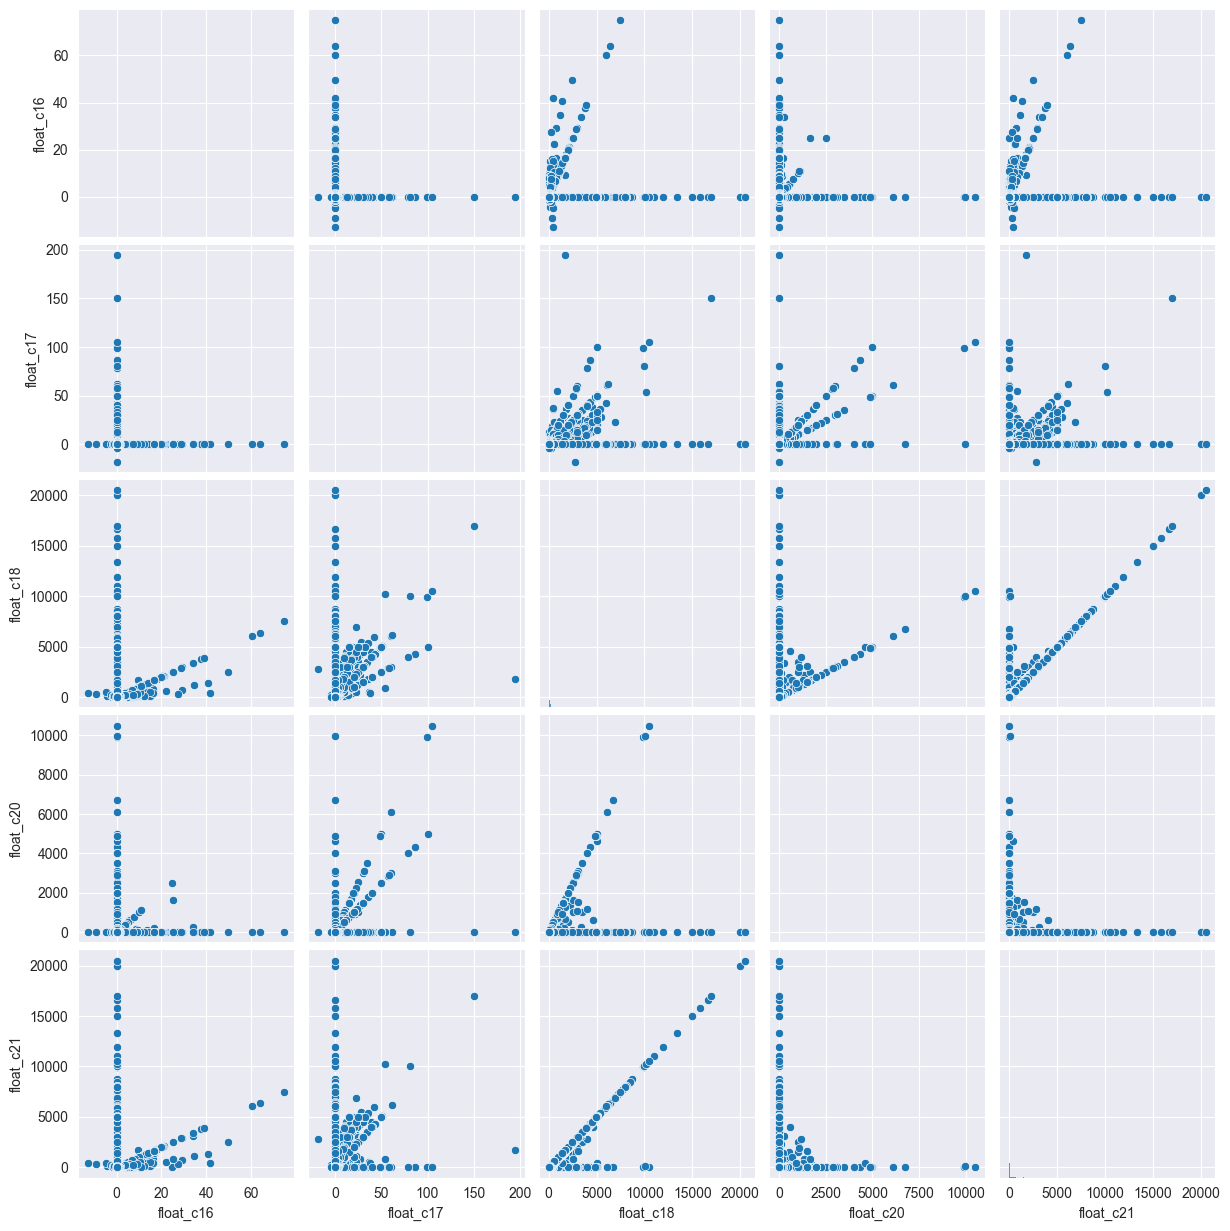

In [16]:
sns.pairplot(transactions[['float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']])

In [17]:
# Correlation matrix
transactions[['float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']].corr()

,float_c16,float_c17,float_c18,float_c20,float_c21
float_c16,1.000,-0.007,0.068,0.020,0.066
float_c17,-0.007,1.000,0.336,0.352,0.281
float_c18,0.068,0.336,1.000,0.164,0.986
float_c20,0.020,0.352,0.164,1.000,-0.003
float_c21,0.066,0.281,0.986,-0.003,1.000


## Transactions (data insights)

In [19]:
# fl_c6 = 1 (True) only if float_c17 <= 0

transactions[transactions['fl_c6'] == 1]['float_c17'].max()
# transactions[transactions['float_c17'] < 0]['fl_c6'].min()

np.float32(0.0)

In [20]:
# int_c19 = 1 only if float_c16 <= 0 and int_c19 = -1 only if float_c16 >= 0

transactions_sample[(transactions_sample['int_c19'] == -1)]['float_c16'].max()

np.float32(75.0)

# App activity

In [22]:
from utils import handle_activity_null_values, read_app_activity

app_activity = read_app_activity('data/samples/APP_ACTIVITY_SAMPLE.csv')
app_activity = handle_activity_null_values(app_activity)

In [23]:
app_activity.head()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c14
0,4130085634078954,16077501765116789483,2025-04-29,21,1,3,1,1,2,0,8.000,55.000,0.500
1,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
2,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
3,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
4,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,50.000,0.300


In [24]:
app_activity.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 878373 entries, 0 to 882318
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   client_id      878373 non-null  uint64        
 1   device_id      878373 non-null  uint64        
 2   activity_date  878373 non-null  datetime64[ns]
 3   cat_c3         878373 non-null  int32         
 4   cat_c4         878373 non-null  int32         
 5   cat_c5         878373 non-null  int32         
 6   cat_c6         878373 non-null  int32         
 7   cat_c8         878373 non-null  int8          
 8   cat_c9         878373 non-null  int32         
 9   cat_c10        878373 non-null  int8          
 10  float_c11      878373 non-null  float32       
 11  float_c12      878373 non-null  float32       
 12  float_c14      878373 non-null  float32       
dtypes: datetime64[ns](1), float32(3), int32(5), int8(2), uint64(2)
memory usage: 55.3 MB


In [25]:
app_activity.describe()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c14
count,878373.000,878373.000,878373,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000
mean,9571253373745823744.000,9231408809479630848.000,2025-04-15 20:31:14.860907264,20.883,1.027,3.008,2.181,0.868,1.402,0.628,37.813,55.007,0.892
min,4130085634078954.000,104983071147102.000,2024-12-01 00:00:00,1.000,1.000,3.000,1.000,0.000,1.000,0.000,-1.000,0.000,0.000
25%,5265600578563724288.000,4617571190849843200.000,2025-03-01 00:00:00,21.000,1.000,3.000,1.000,1.000,1.000,0.000,9.000,35.000,0.286
50%,9896623871746766848.000,9048332729640222720.000,2025-04-17 00:00:00,21.000,1.000,3.000,2.000,1.000,1.000,1.000,35.000,55.000,0.525
75%,13870888663844587520.000,13668502796394041344.000,2025-06-01 00:00:00,21.000,1.000,3.000,3.000,1.000,2.000,1.000,64.000,76.000,0.800
max,18440239832994052096.000,18444959085162446848.000,2025-08-31 00:00:00,21.000,8.000,13.000,8.000,1.000,2.000,1.000,97.000,100.000,16.059
std,5198907035237409792.000,5304615003601307648.000,NaN,1.227,0.197,0.191,1.503,0.339,0.490,0.483,29.025,26.381,1.849


In [27]:
# Get the mean of app activity by client
app_activity.groupby('client_id').size().mean()

np.float64(490.43718592964825)

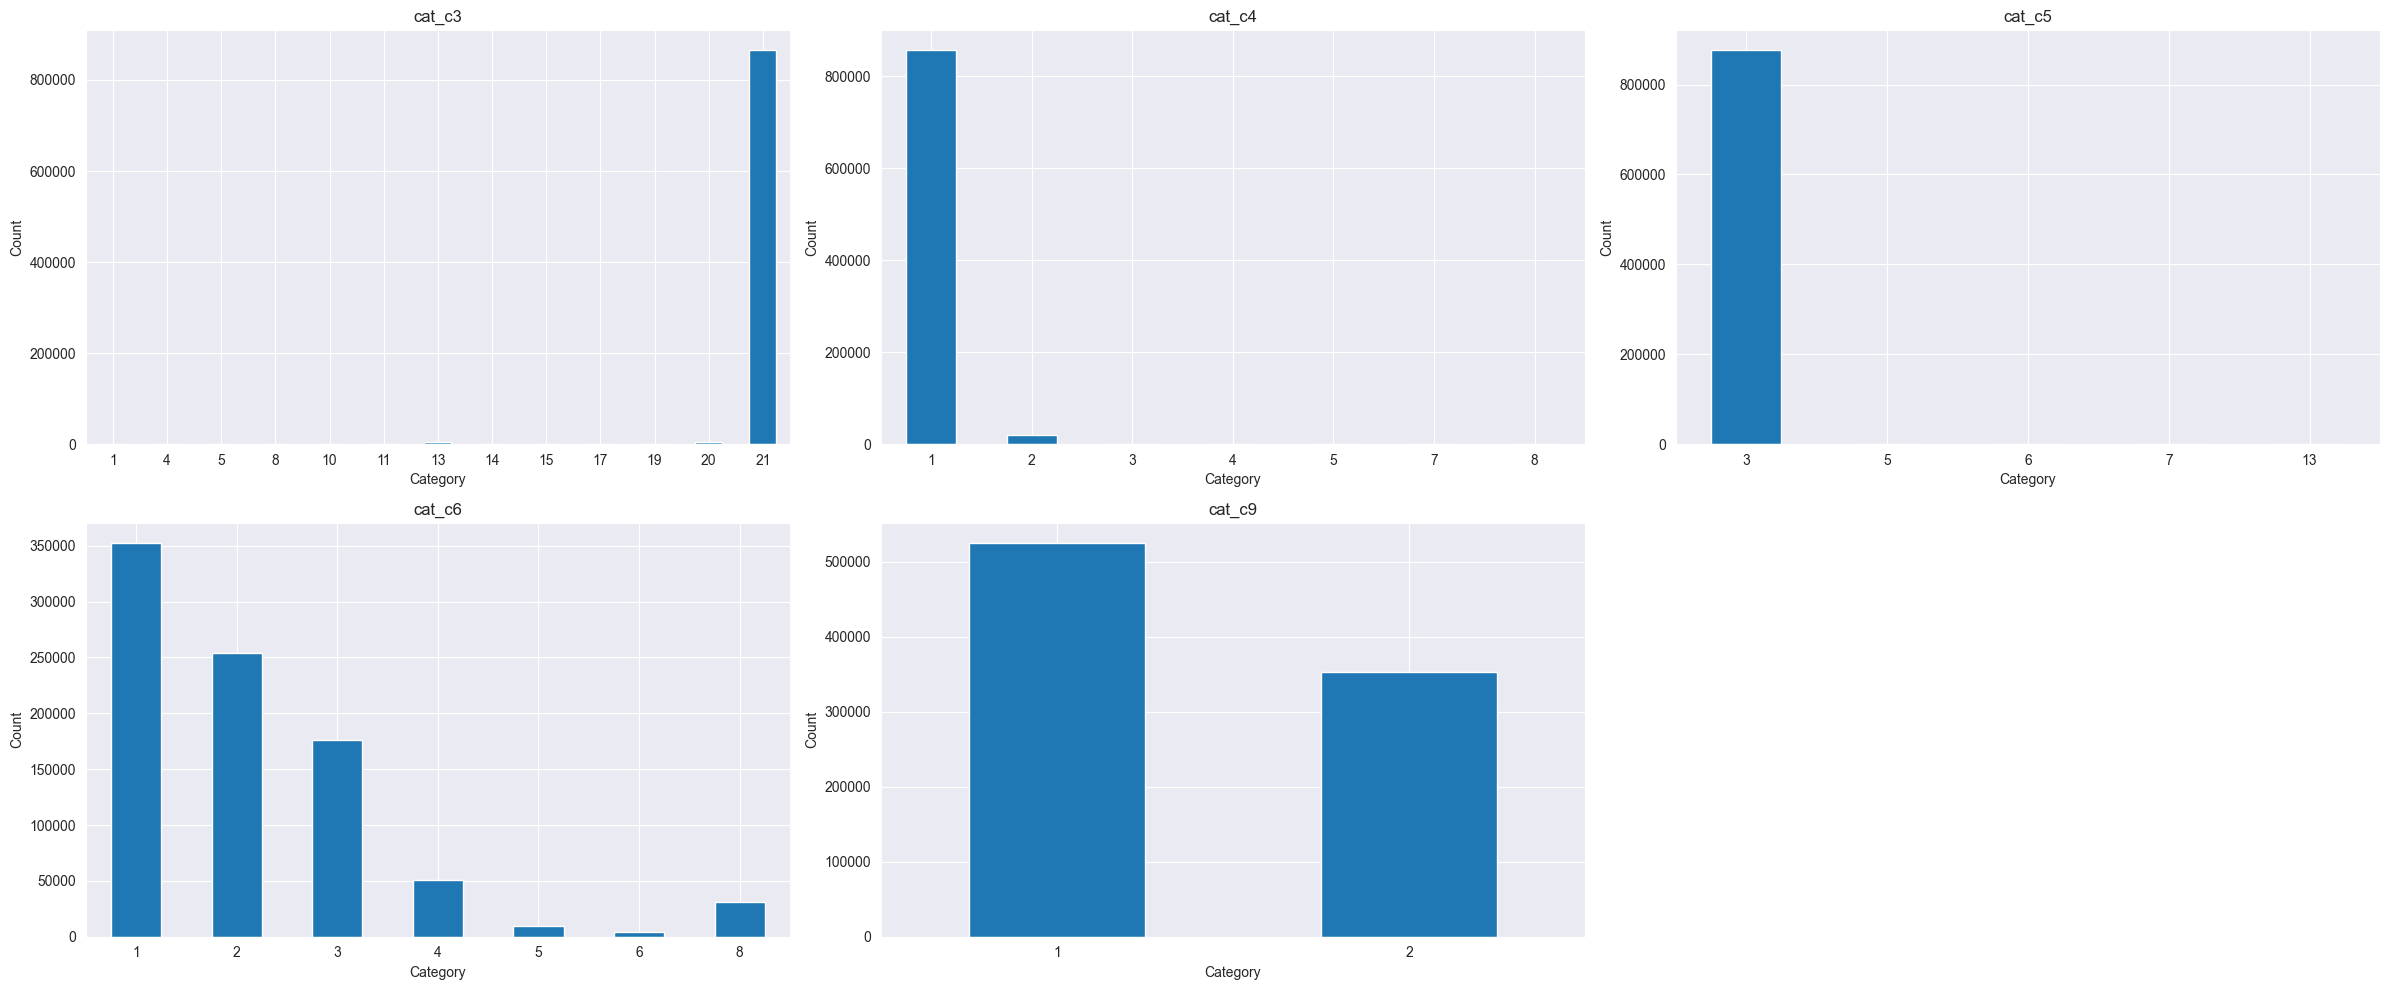

In [28]:
cat_cols = ['cat_c3', 'cat_c4', 'cat_c5', 'cat_c6', 'cat_c9']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = app_activity[col].value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [29]:
# Categorical data counts

for col in cat_cols:
    print(app_activity[col].value_counts().sort_index())
    print()

cat_c3
1       1340
4        841
5         61
8        625
10      1356
11        58
13      3877
14       112
15        25
17       238
19       267
20      4033
21    865540
Name: count, dtype: int64

cat_c4
1    857206
2     19734
3       738
4       227
5       362
7        75
8        31
Name: count, dtype: int64

cat_c5
3     876648
5         61
6        902
7        625
13       137
Name: count, dtype: int64

cat_c6
1    352797
2    253569
3    176004
4     50407
5      9878
6      4617
8     31101
Name: count, dtype: int64

cat_c9
1    525446
2    352927
Name: count, dtype: int64



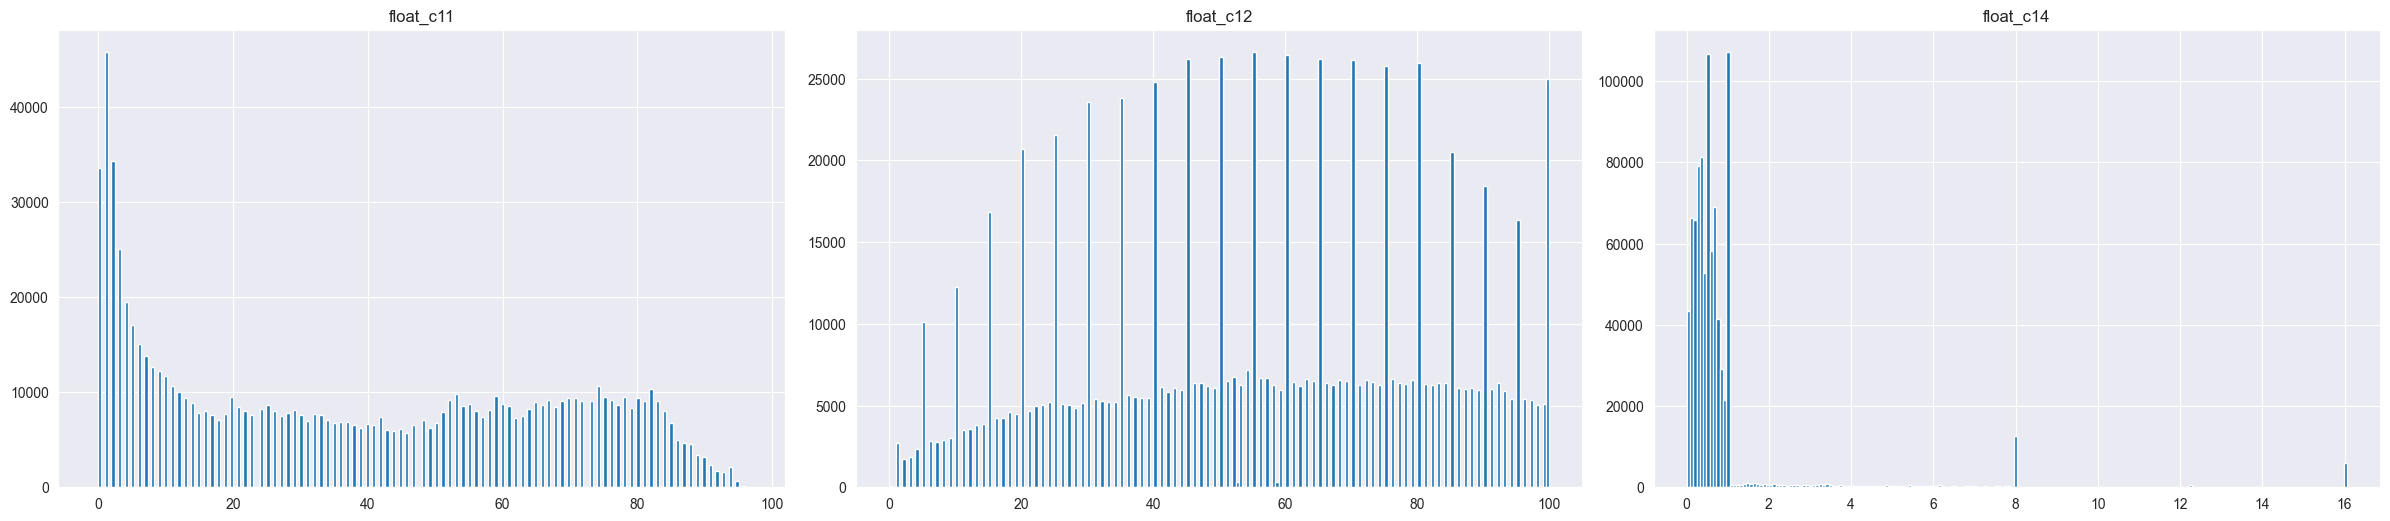

In [30]:
# float_cols = ['float_c11', 'float_c12', 'float_c13', 'float_c14', 'float_c15', 'float_c16', 'float_c17']
float_cols = ['float_c11', 'float_c12', 'float_c14']
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(float_cols):
    ax = axes[i]
    counts = app_activity[col].hist(ax=ax, bins=200)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=0)

for j in range(len(float_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


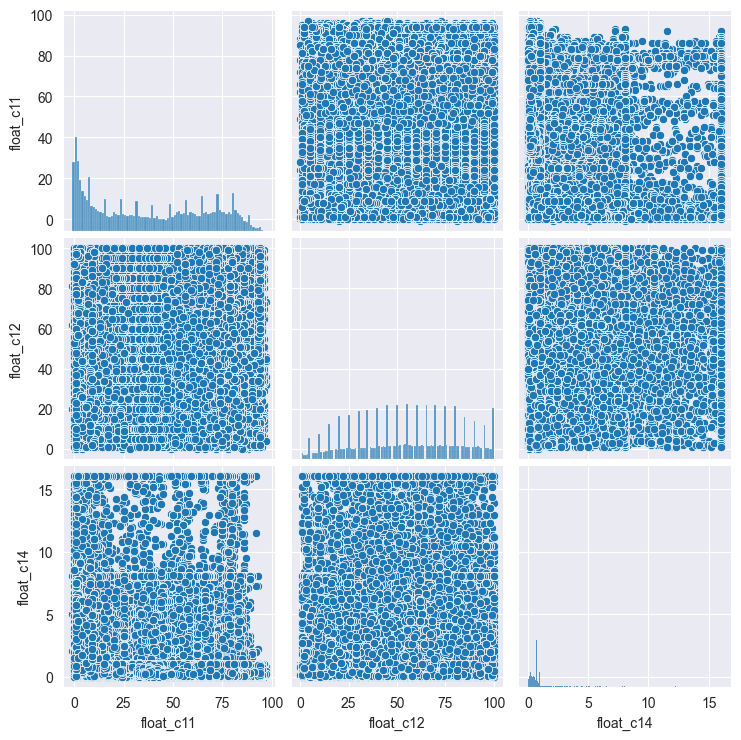

In [31]:
# sns.pairplot(app_activity[['float_c11', 'float_c12', 'float_c13', 'float_c14', 'float_c15', 'float_c16', 'float_c17']])
sns.pairplot(app_activity[['float_c11', 'float_c12', 'float_c14']])

In [32]:
# Correlation matrix
# app_activity[['float_c11', 'float_c12', 'float_c13', 'float_c14', 'float_c15', 'float_c16', 'float_c17']].corr()
app_activity[['float_c11', 'float_c12', 'float_c14']].corr()

,float_c11,float_c12,float_c14
float_c11,1.000,0.134,-0.053
float_c12,0.134,1.000,-0.011
float_c14,-0.053,-0.011,1.000


# Communications

In [ ]:
from utils import read_communications

communications = read_communications('data/samples/COMMUNICATIONS_SAMPLE.csv')

In [ ]:
communications.head()

In [ ]:
communications.info()

In [ ]:
communications.describe()

In [ ]:
# Get the mean of communications by client
communications.groupby('client_id').size().mean()

In [ ]:
cat_cols = ['cat_c2', 'cat_c3', 'cat_c4', 'cat_c5']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = communications[col].value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    # ax.tick_params(axis='x', rotation=0)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Categorical data counts

# for col in cat_cols:
#     print(communications[col].value_counts().sort_index())
#     print()

communications['cat_c5'].value_counts().sort_index()